<a href="https://colab.research.google.com/github/robsworld718/Wine-Quality/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

In [3]:
WineQ_df = pd.read_csv('/content/WineQT.csv', index_col=False)
WineQ_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


#Cleaning

In [4]:
#There was no missing data
WineQ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
WineQ_df.drop(columns='Id', inplace=True)

In [6]:
WineQ_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#There weere no duplicated rows
WineQ_df.duplicated().sum()

125

In [8]:
WineQ_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#Feature Visualization

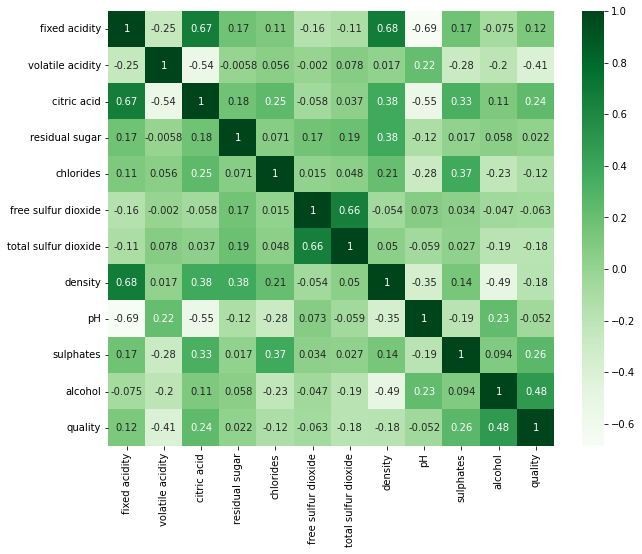

In [9]:
corr = WineQ_df.corr()

import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap = 'Greens', annot = True)

In [10]:
WineQ_df['quality'].nunique()

6

In [11]:
WineQ_df['fixed acidity'].value_counts()

7.2     43
7.1     41
7.0     40
7.8     40
7.5     37
        ..
4.6      1
13.7     1
13.4     1
13.5     1
12.2     1
Name: fixed acidity, Length: 91, dtype: int64

In [12]:
WineQ_df['density'].value_counts().sort_index()

0.99007    1
0.99020    1
0.99064    2
0.99084    1
0.99120    1
          ..
1.00260    2
1.00289    1
1.00315    2
1.00320    1
1.00369    1
Name: density, Length: 388, dtype: int64

#Univariate Visualizations

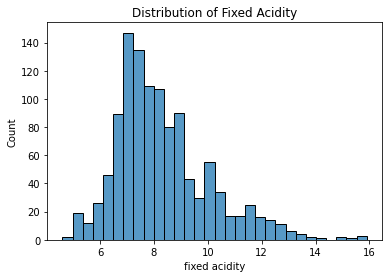

In [13]:
ax = sns.histplot(data=WineQ_df, x='fixed acidity',bins='auto');
ax.set_title('Distribution of Fixed Acidity');

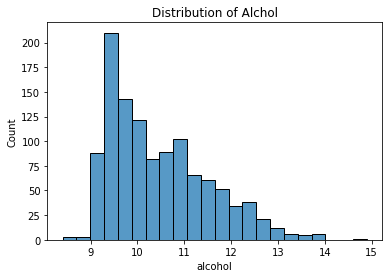

In [14]:
ax = sns.histplot(data=WineQ_df, x='alcohol',bins='auto');
ax.set_title('Distribution of Alchol');
##Here we have a linear distribution skewed to the left

count    1143.000000
mean        8.311111
std         1.747595
min         4.600000
25%         7.100000
50%         7.900000
75%         9.100000
max        15.900000
Name: fixed acidity, dtype: float64

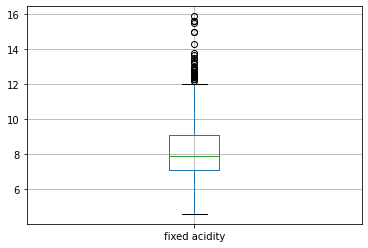

In [15]:
WineQ_df.boxplot(column = 'fixed acidity');
WineQ_df['fixed acidity'].describe()
## There are roughly 181.7 outliers about 16% 0f this columns data points

count    1143.000000
mean        0.996730
std         0.001925
min         0.990070
25%         0.995570
50%         0.996680
75%         0.997845
max         1.003690
Name: density, dtype: float64

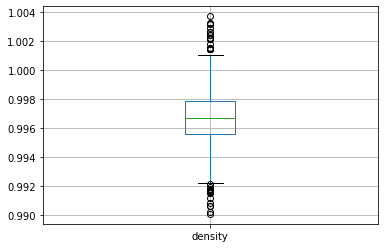

In [16]:
WineQ_df.boxplot(column = 'density');
WineQ_df['density'].describe()

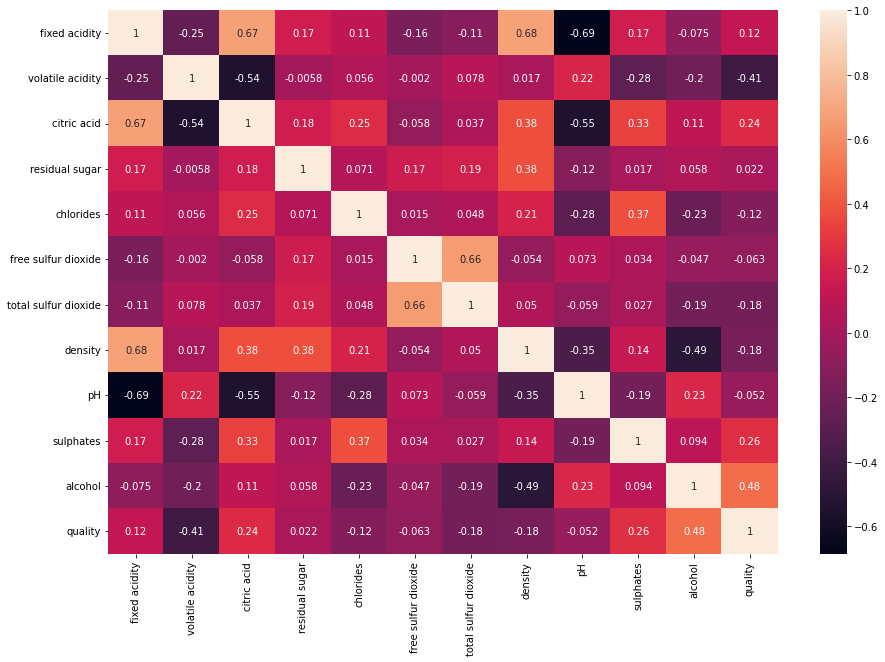

In [17]:
#The highest correlation is between fixed acidity density
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(WineQ_df.corr(), annot=True, ax=ax)

#Multivariate Visualization

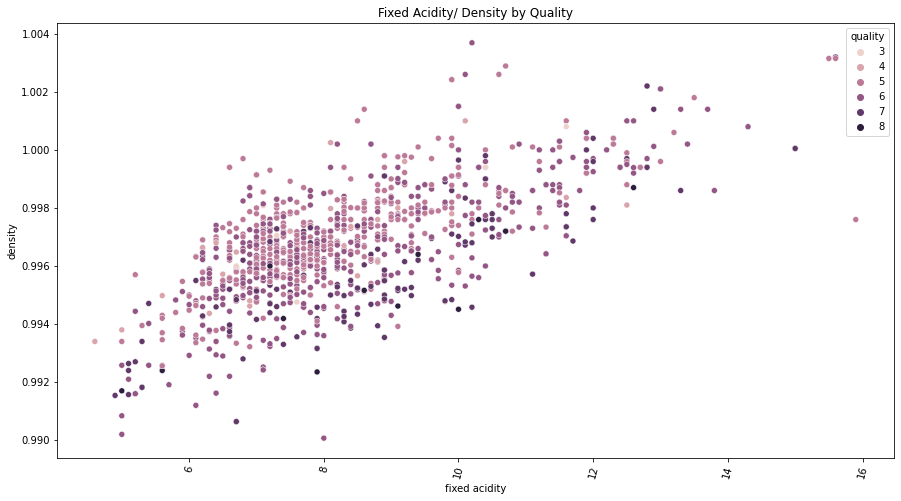

In [18]:
#According to the heatmap we can see the highest correlated patterns have a linear correlation for regression models and enough grouped data for classification cases
plt.figure(figsize=(15,8))
plt.xticks(rotation=75)
plt.title('Fixed Acidity/ Density by Quality')
ax = sns.scatterplot(x="fixed acidity", y="density", hue=WineQ_df["quality"], data=WineQ_df)

#Pre-Processing for model selection

In [19]:
#Bining the quality column into good an bad options for binary classification
bins = (2, 6.5, 8) 
group_names = ['bad', 'good']
WineQ_df['quality'] = pd.cut(WineQ_df['quality'], bins = bins, labels = group_names)

In [20]:
WineQ_df['quality'].replace({'bad': 0, 'good': 1}, inplace=True)
WineQ_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [21]:
#Here we can see that we have an unbalanced dataset
WineQ_df['quality'].value_counts(normalize = True)

0    0.860892
1    0.139108
Name: quality, dtype: float64

In [22]:
WineQ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [23]:
Good = WineQ_df[WineQ_df['quality'] > 0]
Bad =  WineQ_df[WineQ_df['quality'] < 1][0:158]

In [24]:
#a_list = [Good,Bad]
#balanced_df = pd.concat(a_list)

In [25]:
#WineQ_df = balanced_df

In [26]:
X = WineQ_df.drop(columns='quality')
y = WineQ_df['quality']

In [27]:
#I used stratify= y to ensure that any randomn split is proportioned
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, )

In [28]:
#Selected num collumns using selector
num_selector = make_column_selector(dtype_include='number')

mean_imputer = SimpleImputer(strategy = 'mean')

#Instantiated scaler to standardized to numeric columns to scale
scaler = StandardScaler()
ohe = OneHotEncoder()

num_pipe = make_pipeline(mean_imputer,scaler)

num_tuple = (num_pipe, num_selector)

In [29]:
#Checking to see if all numeric columns are in the num selector for training data
num_selector(X_train)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [30]:
col_transformer = make_column_transformer(num_tuple, remainder = 'passthrough')

In [31]:
pipe0 = make_pipeline(col_transformer, ohe)

In [32]:
from sklearn import set_config
set_config(display='diagram')
#fitting the column tranformer to the Xtrain data
X_train_processed = pipe0.fit(X_train)
X_train_processed

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f60dc7893d0>)])),
                ('onehotencoder', OneHotEncoder())])

In [33]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components = .95)

processing = make_pipeline(scaler, pca)

print('Shape before PCA:', X_train.shape)
print('Shape after PCA:', processing.fit_transform(X_train).shape)
print('Column count reduced by: ', X_train.shape[1] - processing.fit_transform(X_train).shape[1])

Shape before PCA: (857, 11)
Shape after PCA: (857, 9)
Column count reduced by:  2


In [34]:
#Extracting the steps from each pipeline
col_transformer.named_transformers_

{'pipeline': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())])}

In [35]:
final_cols = num_selector(X_train)
final_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [36]:
#Transforming the X_train and X_test into an array
X_train_transformed = col_transformer.transform(X_train)

X_test_transformed = col_transformer.transform(X_test)

In [37]:
#Converted both into individual dataframes all data has been encoded and scaled to apply to our models
X_train_output = pd.DataFrame(X_train_transformed, columns = final_cols)

X_test_output = pd.DataFrame(X_test_transformed, columns = final_cols)

In [38]:
#Checking both outputs everything is scaled and encoded
print(X_train_output.head()),
print('n/'),
print(X_test_output.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.503090          0.004368    -0.150502        0.035160  -0.172527   
1       0.161316         -1.215084     0.679288       -0.240332  -0.149006   
2      -0.864007          0.458118    -1.187741       -0.722444  -0.666477   
3      -0.693120          1.280539    -0.617260       -0.515825   0.509594   
4       1.072714          0.798430     0.627426       -0.446952  -0.737041   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             1.292176              2.825055  0.589361 -0.638186  -0.517056   
1            -1.236700             -1.184141 -0.822727 -0.255453   0.077253   
2            -1.034390             -1.063564 -0.756216  0.701380  -0.338763   
3             0.482936              1.167117 -0.408310 -0.765764  -0.933073   
4            -0.933235             -0.852553  0.446106 -0.893342  -1.111366   

    alcohol  
0 -0.859263  
1  1.344484  
2 -0.859263  


#Baseline Model

In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [40]:
#Created a function to get our training and testing metrics to evaluate our classification models
def evaluate_classification(y_true, y_predicted, average=None):
  accuracy = accuracy_score(y_true, y_predicted)
  recall = recall_score(y_true, y_predicted, average=average)
  precision = precision_score(y_true, y_predicted, average=average)
  f1 = f1_score(y_true, y_predicted, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')

In [41]:
#Creating and evaluating a baseline
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="stratified")

dummy_pipe = make_pipeline(scaler, dummy)

dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dummyclassifier', DummyClassifier(strategy='stratified'))])

In [42]:
train_dummy_preds = dummy_pipe.predict(X_train)
test_dummy_preds = dummy_pipe.predict(X_test)

Randomn Forest Model

In [43]:
#Without PCA
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

rf_pipe = make_pipeline(scaler, rf)

In [44]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestclassifier', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomfore

In [45]:
rf_param_grid = {
    'randomforestclassifier__max_depth': (4, 8),
    'randomforestclassifier__n_estimators': (200, 500, 1000),
    'randomforestclassifier__min_samples_leaf': [3,15],   
}

In [46]:
rf_pipe_gs = GridSearchCV(rf_pipe, rf_param_grid)

In [47]:
%%time
rf_pipe_gs.fit(X_train, y_train)
print('Best RF Parameters:')
print(rf_pipe_gs.best_params_)
best_pipe = rf_pipe_gs.best_estimator_
print(f'Accuracy of best RF model is: {best_pipe.score(X_test, y_test)}')

Best RF Parameters:
{'randomforestclassifier__max_depth': 8, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__n_estimators': 500}
Accuracy of best RF model is: 0.8881118881118881
CPU times: user 1min 23s, sys: 1.06 s, total: 1min 24s
Wall time: 1min 24s


In [48]:
best_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=3,
                                        n_estimators=500, random_state=42))])

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       246
           1       0.67      0.40      0.50        40

    accuracy                           0.89       286
   macro avg       0.79      0.68      0.72       286
weighted avg       0.87      0.89      0.88       286



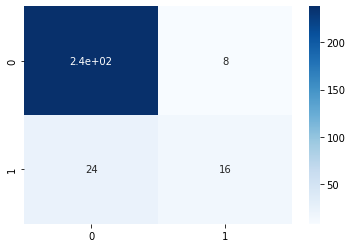

In [49]:
#print result of the model
test_preds = best_pipe.predict(X_test).round() 
print(classification_report(y_test, test_preds))
cf = confusion_matrix(y_test, test_preds)
sns.heatmap(cf, annot=True, cmap = 'Blues');

In [50]:
train_rf_preds = best_pipe.predict(X_train)
test_rf_preds = best_pipe.predict(X_test)

best_pipe.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [51]:
#With PCA
rf_pca_param_grid = {
    'randomforestclassifier__max_depth': (4, 8),
    'randomforestclassifier__n_estimators': (140, 280, 360),
    'randomforestclassifier__min_samples_leaf': [3,15],   
}

In [52]:
rf_pipe_pca = GridSearchCV(rf_pipe, rf_pca_param_grid)

In [53]:
%%time
rf_pipe_pca.fit(X_train, y_train)
print('Best RF Parameters:')
print(rf_pipe_pca.best_params_)
best_pipe_pca = rf_pipe_pca.best_estimator_
print(f'Accuracy of best RF model is: {best_pipe.score(X_test, y_test)}')

Best RF Parameters:
{'randomforestclassifier__max_depth': 8, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__n_estimators': 360}
Accuracy of best RF model is: 0.8881118881118881
CPU times: user 41.5 s, sys: 499 ms, total: 42 s
Wall time: 42.5 s


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       246
           1       0.70      0.40      0.51        40

    accuracy                           0.89       286
   macro avg       0.80      0.69      0.72       286
weighted avg       0.88      0.89      0.88       286



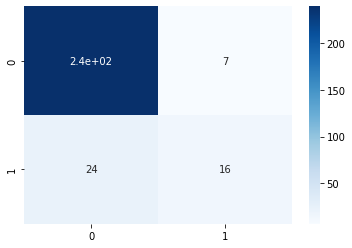

In [54]:
#print result of the model
test_preds = rf_pipe_pca.predict(X_test).round() 
print(classification_report(y_test, test_preds))
cf = confusion_matrix(y_test, test_preds)
sns.heatmap(cf, annot=True, cmap = 'Blues');

XGBoost Model

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_pipe = make_pipeline(col_transformer, xgb)
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f60dc7893d0>)])),
                ('xgbclassifier', XGBClassifier())])

In [56]:
xgb_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f60dc7893d0>)])),
  ('xgbclassifier', XGBClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())]),
 

In [57]:
xgb_param_grid = {
    'xgbclassifier__max_depth': (2, 4, 8),
    'xgbclassifier__n_estimators': (200, 500, 1000),
    'xgbclassifier__min_samples_leaf': [3, 10,15],
    'xgbclassifier__booster': ('gbtree', 'gblinear')   
}

In [58]:
xgb_pipe_gs = GridSearchCV(xgb_pipe, xgb_param_grid)

In [59]:
%%time
xgb_pipe_gs.fit(X_train, y_train)
print('Best RF Parameters:')
print(xgb_pipe_gs.best_params_)
best_pipe2 = xgb_pipe_gs.best_estimator_
print(f'Accuracy of best XGB model is: {best_pipe2.score(X_test, y_test)}')

Best RF Parameters:
{'xgbclassifier__booster': 'gbtree', 'xgbclassifier__max_depth': 4, 'xgbclassifier__min_samples_leaf': 3, 'xgbclassifier__n_estimators': 500}
Accuracy of best XGB model is: 0.8846153846153846
CPU times: user 1min 23s, sys: 1.18 s, total: 1min 24s
Wall time: 1min 24s


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       246
           1       0.59      0.57      0.58        40

    accuracy                           0.88       286
   macro avg       0.76      0.75      0.76       286
weighted avg       0.88      0.88      0.88       286



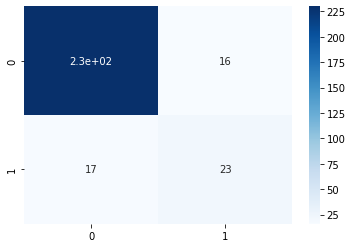

In [60]:
#print result of the model
test_preds = xgb_pipe_gs.predict(X_test).round() 
print(classification_report(y_test, test_preds))
cf = confusion_matrix(y_test, test_preds)
sns.heatmap(cf, annot=True, cmap = 'Blues');

In [61]:
best_pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f60da237f50>)])),
                ('xgbclassifier',
                 XGBClassifier(max_depth=4, min_samples_leaf=3,
                               n_estimators=500))])

In [62]:
train_xgb_preds = best_pipe2.predict(X_train)
test_xgb_preds = best_pipe2.predict(X_test)

best_pipe2.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [63]:
#With PCA
xgb_pca_param_grid = {
    'xgbclassifier__max_depth': (2, 4, 8),
    'xgbclassifier__n_estimators': (200, 500, 1000),
    'xgbclassifier__min_samples_leaf': [3, 10,15],
    'xgbclassifier__booster': ('gbtree', 'gblinear')   
}

In [64]:
xgb_pipe_pca = GridSearchCV(xgb_pipe, xgb_pca_param_grid)

In [65]:
%%time
xgb_pipe_pca.fit(X_train, y_train)
print('Best RF Parameters:')
print(xgb_pipe_pca.best_params_)
best_pipe_pca2 = xgb_pipe_pca.best_estimator_
print(f'R^2 of best RF model is: {best_pipe_pca2.score(X_test, y_test)}')

Best RF Parameters:
{'xgbclassifier__booster': 'gbtree', 'xgbclassifier__max_depth': 4, 'xgbclassifier__min_samples_leaf': 3, 'xgbclassifier__n_estimators': 500}
R^2 of best RF model is: 0.8846153846153846
CPU times: user 1min 25s, sys: 1.2 s, total: 1min 26s
Wall time: 1min 25s


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       246
           1       0.59      0.57      0.58        40

    accuracy                           0.88       286
   macro avg       0.76      0.75      0.76       286
weighted avg       0.88      0.88      0.88       286



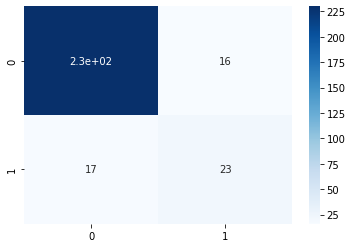

In [66]:
#print result of the model
test_preds = xgb_pipe_pca.predict(X_test).round() 
print(classification_report(y_test, test_preds))
cf = confusion_matrix(y_test, test_preds)
sns.heatmap(cf, annot=True, cmap = 'Blues');

In [67]:
best_pipe_pca2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f60da8d9710>)])),
                ('xgbclassifier',
                 XGBClassifier(max_depth=4, min_samples_leaf=3,
                               n_estimators=500))])

In [68]:
train_xgb_preds = best_pipe_pca2.predict(X_train)
test_xgb_preds = best_pipe_pca2.predict(X_test)

best_pipe_pca2.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [69]:
%%time
xgb_pipe_pca.fit(X_train, y_train)
print('Best RF Parameters:')
print(xgb_pipe_pca.best_params_)
best_pipe_pca2 = xgb_pipe_pca.best_estimator_
print(f'R^2 of best RF model is: {best_pipe_pca2.score(X_test, y_test)}')

Best RF Parameters:
{'xgbclassifier__booster': 'gbtree', 'xgbclassifier__max_depth': 4, 'xgbclassifier__min_samples_leaf': 3, 'xgbclassifier__n_estimators': 500}
R^2 of best RF model is: 0.8846153846153846
CPU times: user 1min 22s, sys: 1.14 s, total: 1min 23s
Wall time: 1min 21s


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       246
           1       0.59      0.57      0.58        40

    accuracy                           0.88       286
   macro avg       0.76      0.75      0.76       286
weighted avg       0.88      0.88      0.88       286



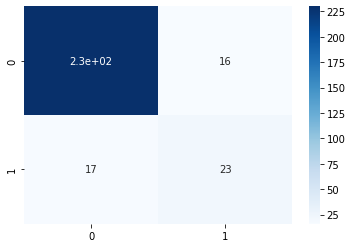

In [70]:
#print result of the model
test_preds = xgb_pipe_pca.predict(X_test).round() 
print(classification_report(y_test, test_preds))
cf = confusion_matrix(y_test, test_preds)
sns.heatmap(cf, annot=True, cmap = 'Blues');

Neural Networks

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
#Check shape of X_train
input_shape = X_train.shape[1]
input_shape

11

In [73]:
#Instantiate model
model = Sequential()

In [74]:
#Creating an input Layer with 3 hidden layers
model.add(Dense(12, input_dim = input_shape, activation = 'relu')) 
model.add(Dropout(.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(3, activation = 'relu'))
model.add(Dropout(.2))
#output layer
model.add(Dense(1, activation = 'sigmoid'))

In [75]:
model.compile(loss = 'bce', optimizer = 'adam', metrics='accuracy')

In [76]:
#Fitting our model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=30)

Epoch 1/30
27/27 [==============================] - 2s 12ms/step - loss: 1.6623 - accuracy: 0.5578 - val_loss: 0.5808 - val_accuracy: 0.8601
Epoch 2/30
27/27 [==============================] - 0s 3ms/step - loss: 0.8612 - accuracy: 0.7025 - val_loss: 0.4714 - val_accuracy: 0.8601
Epoch 3/30
27/27 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.7468 - val_loss: 0.4716 - val_accuracy: 0.8601
Epoch 4/30
27/27 [==============================] - 0s 4ms/step - loss: 0.6279 - accuracy: 0.7865 - val_loss: 0.4672 - val_accuracy: 0.8601
Epoch 5/30
27/27 [==============================] - 0s 4ms/step - loss: 0.6234 - accuracy: 0.8016 - val_loss: 0.4638 - val_accuracy: 0.8601
Epoch 6/30
27/27 [==============================] - 0s 4ms/step - loss: 0.6028 - accuracy: 0.8098 - val_loss: 0.4596 - val_accuracy: 0.8601
Epoch 7/30
27/27 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.8180 - val_loss: 0.4563 - val_accuracy: 0.8601
Epoch 8/30
27/27 [=

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 3)                 2

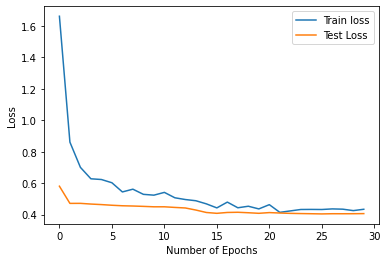

In [78]:
#visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend();

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       246
           1       0.00      0.00      0.00        40

    accuracy                           0.86       286
   macro avg       0.43      0.50      0.46       286
weighted avg       0.74      0.86      0.80       286



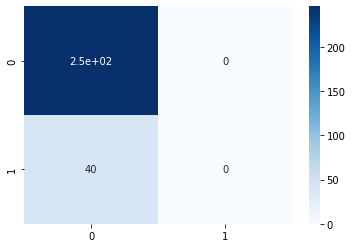

In [79]:
test_preds = model.predict(X_test).round() 
print(classification_report(y_test, test_preds))
cf = confusion_matrix(y_test, test_preds)
sns.heatmap(cf, annot=True, cmap = 'Blues');

In [80]:
#first hidden layers
model.add(Dense(20, input_dim = input_shape, activation = 'relu')) 
model.add(Dropout(.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(5, activation = 'relu'))
model.add(Dropout(.2))
#output layer
model.add(Dense(1, activation = 'sigmoid'))